In [1]:
!nvidia-smi

Tue Aug 15 14:01:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.4/7.4 MB 27.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 719.8/719.8 kB 45.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81.1/81.1 kB 9.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 64.8/64.8 kB 6.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 268.8/268.8 kB 25.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 66.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [4]:
import torch
import json
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/New folder

/content/drive/MyDrive/New folder


In [13]:
df = pd.read_csv("final_details.csv")


In [14]:
df=df.drop_duplicates(subset=['url'])
df = df[df.types != '[]']
df.describe()

title  \
count    18397   
unique   17332   
top     Paella   
freq        24   

                                                                              url  \
count                                                                       18397   
unique                                                                      18397   
top     https://eatsmarter.com/recipes/cucumber-sandwiches-with-fresh-goat-cheese   
freq                                                                            1   

       description                 types  
count        18396                 18397  
unique       14719                 17254  
top        30 mins  ['None', 'low-carb']  
freq           320                   157

In [15]:
df = df.dropna().reset_index(drop=True)
df.shape

(18396, 4)

In [16]:
import ast

for i in range(len(df.types)):
  try:
    list_1 = ast.literal_eval(df.types[i])
    if isinstance(list_1, list):
      df.types[i] = list_1
  except (ValueError, SyntaxError):
    pass

In [17]:
 types_list = df.types.to_list()

In [18]:
mapping = {
    'Meal for Four': 'Family Meal',
    'Onion': 'Vegetable',
    'Poultry': 'Chicken',
    'Course': 'Main Course',
    'Osteoarthritis': 'Reduce Osteoarthritis',
    'Stress': 'Reduce Stress',
    'Iron Deficiency': 'Reduce Iron Deficiency',
    'Cooking on vacation': 'vacation',
    'saltwater\xa0Fish': 'saltwater fish',
    'Root Vegetable': 'Vegetable',
    'Pregnancy': 'Good during Pregnancy',
    'Fertility': 'Improves Fertility'
}

for sublist in types_list:
    for i in range(len(sublist)):
        sublist[i] = mapping.get(sublist[i], sublist[i])

types_list[1]

['Finger Food',
 'Low-cholesterol',
 'Fitness',
 'Healthy Eating',
 'Low-calorie',
 'Low-calorie Meat Dish',
 '250-400 Calorie',
 'low-carb',
 'non-alcoholic',
 'egg-free',
 'Pescetarian',
 'Special',
 '25-Minute',
 'Buffet',
 'Exotic',
 'vacation',
 'festively',
 'Family Meal',
 'Garden Party',
 'Guest',
 'Party',
 'Picnic',
 'Cooking',
 'Fish',
 'Vegetable',
 'leafy green vegetable',
 'Vegetable',
 'Herb',
 'Dairy',
 'Fruit',
 'Brunch',
 'Snack',
 'Party Snack',
 'Party Snack',
 'Tapas',
 'Appetizer']

In [19]:
for sublist in types_list:
    new_sublist = []
    for item in sublist:
        if item not in ['Menu', 'Guest', 'Easy', 'Lactation', 'Quick','Cooking']:
            new_sublist.append(item)
    sublist[:] = new_sublist
types_list[1]

['Finger Food',
 'Low-cholesterol',
 'Fitness',
 'Healthy Eating',
 'Low-calorie',
 'Low-calorie Meat Dish',
 '250-400 Calorie',
 'low-carb',
 'non-alcoholic',
 'egg-free',
 'Pescetarian',
 'Special',
 '25-Minute',
 'Buffet',
 'Exotic',
 'vacation',
 'festively',
 'Family Meal',
 'Garden Party',
 'Party',
 'Picnic',
 'Fish',
 'Vegetable',
 'leafy green vegetable',
 'Vegetable',
 'Herb',
 'Dairy',
 'Fruit',
 'Brunch',
 'Snack',
 'Party Snack',
 'Party Snack',
 'Tapas',
 'Appetizer']

In [20]:
for sublist in types_list:
    sublist[:] = list(set(sublist))
types_list[1]

['25-Minute',
 'Herb',
 'Pescetarian',
 'festively',
 'Party Snack',
 'Healthy Eating',
 'Appetizer',
 'Exotic',
 'Picnic',
 'Low-cholesterol',
 'leafy green vegetable',
 'Finger Food',
 'Dairy',
 'Fish',
 'Fruit',
 'Fitness',
 'Tapas',
 'Low-calorie',
 'non-alcoholic',
 'Garden Party',
 'Low-calorie Meat Dish',
 'vacation',
 'Party',
 'Family Meal',
 'low-carb',
 'Snack',
 'Vegetable',
 'Special',
 '250-400 Calorie',
 'Buffet',
 'egg-free',
 'Brunch']

In [21]:
df.types=types_list

In [22]:
df

title  \
0         Cucumber Sandwiches with Fresh Goat Cheese   
1      Smoked Trout Tartare with Avocado Mango Salsa   
2                                  Basic Tofu Recipe   
3             Grilled Watermelon with Herbed Ricotta   
4          Egg Bites with Smoked Salmon and Broccoli   
...                                              ...   
18391                     Sausage and Ham Croissants   
18392                        Shakshuka with Eggplant   
18393                                  Currant Jelly   
18394                       Multi-Grain Walnut Bread   
18395                     Homemade Red Currant Jelly   

                                                                                url  \
0         https://eatsmarter.com/recipes/cucumber-sandwiches-with-fresh-goat-cheese   
1      https://eatsmarter.com/recipes/smoked-trout-tartare-with-avocado-mango-salsa   
2                                  https://eatsmarter.com/recipes/basic-tofu-recipe   
3             https://eatsmarter.com/recipes/grilled-watermelon-with-herbed-ricotta   
4          https://eatsmarter.com/recipes/egg-bites-with-smoked-salmon-and-broccoli   
...                                                                             ...   
18391                     https://eatsmarter.com/recipes/sausage-and-ham-croissants   
18392                        https://eatsmarter.com/recipes/shakshuka-with-eggplant   
18393                                https://eatsmarter.com/recipes/currant-jelly-1   
18394                       https://eatsmarter.com/recipes/multi-grain-walnut-bread   
18395                     https://eatsmarter.com/recipes/homemade-red-currant-jelly   

                                                                                                                                                                                                                                                                                                                                 description  \
0                                                             Due to the high water content, the vegetables are very helpful for weight loss. 100 grams of cucumber provide just 12 calories. Cucumbers also contain¬†potassium, iron, zinc,¬†fluorine, and some vitamin C. With the goat's cheese comes satiating protein between the slices.   
1      The sulfur substances contained in chives are responsible for their slight pungency. They provide a slight antibacterial effect and have a positive effect on digestion. If things run smoothly in the intestines, our concentration is also ensured. This is also supported by the omega-3 fatty acids from the smoked salmon trout.   
2                                                                       Do you have a sensitive stomach? Then tofu is perfect for you, because it's easy on the stomach and doesn't put a strain on digestion. Great veggie option: With around 15 percent vegetable protein, soy cheese gives us about as much as most types of meat offer.   
3                            Despite the fruity-sweet taste of Watermelons there is relatively little sugar in it. On top, the fruit provides plenty of liquid for a refreshing feast on hot summer days. Essential oils from Cress help to get disease-causing bacteria under control. For example, cold symptoms can subside more quickly.   
4                                                                                                                                                                Eggs contain a lot of biotin. This B vitamin promotes hair growth and a healthy nail bed. In addition, the substance is needed for all metabolic processes in the organism.   
...                                                                                                                                                                                                                                                                                                                    

In [23]:
types_list = df.types.to_list()
type_count = {}
for type1 in types_list:
  if isinstance(type1, list):
    type_list = type1
  else:
    type_list = eval(type1)
  for type2 in type_list:
    if type2 in type_count.keys():
      type_count[type2] += 1
    else:
      type_count[type2] = 1
print(f"Number of types: {len(type_count)}")
print(type_count)

Number of types: 1095
{'Cheese': 973, 'low-carb': 5870, 'Vegetable': 7173, '25-Minute': 179, 'Herb': 2768, 'Pescetarian': 266, 'festively': 346, 'Party Snack': 166, 'Healthy Eating': 1303, 'Appetizer': 1231, 'Exotic': 308, 'Picnic': 378, 'Low-cholesterol': 846, 'leafy green vegetable': 841, 'Finger Food': 362, 'Dairy': 764, 'Fish': 1938, 'Fruit': 1950, 'Fitness': 171, 'Tapas': 84, 'Low-calorie': 519, 'non-alcoholic': 2169, 'Garden Party': 472, 'Low-calorie Meat Dish': 8, 'vacation': 1759, 'Party': 674, 'Family Meal': 1438, 'Snack': 1307, 'Special': 200, '250-400 Calorie': 876, 'Buffet': 245, 'egg-free': 875, 'Brunch': 910, 'High-protein': 1639, 'regional': 596, 'Japanese': 104, 'meat-free': 733, 'lactose-free': 1157, 'Milk-free': 465, 'nutritional': 1005, 'Gluten-free Vegan Recipe': 208, 'Chinese': 179, 'Vegetarian': 2404, 'Vegan': 947, 'Gluten-free': 981, 'Soy': 181, 'Asian': 1317, 'Mineral-rich': 1064, 'Tofu': 117, 'Gluten-free Snack': 169, 'Vegetarian Salad': 356, 'Main Course': 338

In [24]:
threshold = int(len(df) * 0.05)
rare_types = [key for key, value in type_count.items() if value < threshold]
len(rare_types), rare_types[:10]

(1040,
 ['25-Minute',
  'Pescetarian',
  'festively',
  'Party Snack',
  'Exotic',
  'Picnic',
  'Low-cholesterol',
  'leafy green vegetable',
  'Finger Food',
  'Dairy'])

In [25]:
types_list
revised_types_list = []
indices_to_drop = []

for idx, types in enumerate(types_list):
  if isinstance(types, list):
    type_list = types
  else:
    type_list = eval(types)

  revised_types = []

  for type1 in type_list:
    if type1 not in rare_types:
      revised_types.append(type1)

  if len(revised_types) == 0:
    indices_to_drop.append(idx)
  else:
    revised_types_list.append(revised_types)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(18375, 4)

In [26]:
df['revised_types'] = revised_types_list

In [27]:
df.tail()

title  \
18370  Sausage and Ham Croissants   
18371     Shakshuka with Eggplant   
18372               Currant Jelly   
18373    Multi-Grain Walnut Bread   
18374  Homemade Red Currant Jelly   

                                                             url  \
18370  https://eatsmarter.com/recipes/sausage-and-ham-croissants   
18371     https://eatsmarter.com/recipes/shakshuka-with-eggplant   
18372             https://eatsmarter.com/recipes/currant-jelly-1   
18373    https://eatsmarter.com/recipes/multi-grain-walnut-bread   
18374  https://eatsmarter.com/recipes/homemade-red-currant-jelly   

                                                                                                                                                                                                                      description  \
18370                                           Roll the dough on a lightly floured surface to 4-5 mm (approximately 1/8 inch) thick. Cut into 3 cm (approximately 1 1/4 inch) wide and 20 cm (approximately 8 inch) long strips.   
18371  This¬†delicious vegetable and egg shakshuka dish¬†is packed with a slew of vitamins and minerals thanks to the vegetable mixture as well as powerful protein from the eggs. Shakshukas are versatile and are a complete meal   
18372                                                                                                                                   Remove the jelly¬†from the pan, and place on a long platter. Serve with bread and cheese.¬†   
18373                                       Add both flours, the shredded wheat, ground walnuts ¬†and salt¬†and knead with the dough hook until smooth. Cover and let rise in a warm place until doubled in bulk, about 45 minutes.   
18374                           Bring the mixture to a boil, and cook for 4 minutes. Fill the jelly into the sterilized prepared jars. Seal tightly, and turn upside down for 15 minutes. Turn right side up and cool completely.   

                                                                                                                                                                                                                                                                                                                                                                                                 types  \
18370                                                                                                                                                                                                                                                                                                            [Dairy, Pork, Quark-oil Dough, Breakfast, 250-400 Calorie, Eggs, Spices, Grain, Milk]   
18371  [Family, Sunday cooking, Home Cooking, Hangover Breakfast, skillet dish, European, Fun Food, Spices, North America, soul food, skillet vegetables, Rustic, baked dish, weekend cooking, Family Meal, Tunisian, Pork, What to Cook on the Weekend?, everyday meal, Poached Egg, Hearty Breakfast, Eggs, Vegetable, One-Pot, What to Cook on Sunday?, Breakfast, crowdpleaser, Fried Egg, Brunch]   
18372                                                                                                                                                      [Low-cholesterol, Fruit, lactose-free, non-alcoholic, Sweet Breakfast, Low-sugar, Jelly, Vegetarian, Red Currant Jam, Vegan, fat-free, Gluten-free, Low-fat, Pressure cooking, Red Currant Jelly, Breakfast, Gelling Agent, Spread, Brunch]   
18373                                                                                                                                                                                                                                             [Snack, Bread Dough, Yeast Dough, Breakfast, Country Style, Baking, Picnic, Bread, Rustic, crowdpleaser, Party, weekend cooking, Grain, Nut, Brunch]   
18374                                        

In [28]:
revised_types_list = df.revised_types.to_list()
revised_types_list

[['Cheese', 'low-carb', 'Vegetable'],
 ['Herb',
  'Healthy Eating',
  'Appetizer',
  'Fish',
  'Fruit',
  'non-alcoholic',
  'vacation',
  'Family Meal',
  'low-carb',
  'Snack',
  'Vegetable'],
 ['High-protein',
  'Healthy Eating',
  'lactose-free',
  'non-alcoholic',
  'vacation',
  'low-carb',
  'nutritional',
  'Vegetarian',
  'Vegan',
  'Gluten-free',
  'Asian',
  'Mineral-rich'],
 ['Healthy Eating',
  'Main Course',
  'Appetizer',
  'Summer',
  'Lunch',
  'European',
  'low-carb',
  'nutritional',
  'Vegetarian',
  'Dinner',
  'Gluten-free'],
 ['Baking',
  'Main Course',
  'Appetizer',
  'Summer',
  'low-carb',
  'nutritional',
  'Snack',
  'Gluten-free'],
 ['Spring',
  'Main Course',
  'Dessert',
  'Summer',
  'European',
  'lactose-free',
  'low-carb',
  'nutritional',
  'Snack',
  'Vegan',
  'Gluten-free',
  'high-fiber'],
 ['nutritional', 'Snack', 'Vegan', 'Main Course', 'low-carb'],
 ['High-protein',
  'Good during Pregnancy',
  'Improves Fertility',
  'soup',
  'Reduce Stre

In [29]:
revised_types_list = df.revised_types.to_list()
revised_type_count = {}
for types in revised_types_list:
  type_list = types
  for type1 in type_list:
    if type1 in revised_type_count.keys():
      revised_type_count[type1] += 1
    else:
      revised_type_count[type1] = 1
print(f"Number of types: {len(revised_type_count)}")
print(revised_type_count)

Number of types: 55
{'Cheese': 973, 'low-carb': 5870, 'Vegetable': 7173, 'Herb': 2768, 'Healthy Eating': 1303, 'Appetizer': 1231, 'Fish': 1938, 'Fruit': 1950, 'non-alcoholic': 2169, 'vacation': 1759, 'Family Meal': 1438, 'Snack': 1307, 'High-protein': 1639, 'lactose-free': 1157, 'nutritional': 1005, 'Vegetarian': 2404, 'Vegan': 947, 'Gluten-free': 981, 'Asian': 1317, 'Mineral-rich': 1064, 'Main Course': 3384, 'Summer': 1079, 'Lunch': 3375, 'European': 2812, 'Dinner': 3173, 'Baking': 1265, 'Spring': 1061, 'Dessert': 2500, 'high-fiber': 1164, 'Good during Pregnancy': 982, 'Improves Fertility': 1458, 'soup': 1035, 'Reduce Stress': 1373, 'Diabetic': 924, 'Low-sugar': 1594, 'Reduce Osteoarthritis': 1036, 'Reduce Iron Deficiency': 955, 'Vitamin-rich': 1328, 'diet': 1781, 'Pasta': 2821, 'high cholesterol': 1069, 'Vegetable Salad': 1262, 'saltwater fish': 1291, 'Meat': 2410, 'salad': 3318, 'Eggs': 939, 'Spices': 1947, 'Side Dish': 1004, 'Italian': 1293, 'baked dish': 1194, 'fruit-vegetable': 2

In [30]:
revised_type_count.keys()

dict_keys(['Cheese', 'low-carb', 'Vegetable', 'Herb', 'Healthy Eating', 'Appetizer', 'Fish', 'Fruit', 'non-alcoholic', 'vacation', 'Family Meal', 'Snack', 'High-protein', 'lactose-free', 'nutritional', 'Vegetarian', 'Vegan', 'Gluten-free', 'Asian', 'Mineral-rich', 'Main Course', 'Summer', 'Lunch', 'European', 'Dinner', 'Baking', 'Spring', 'Dessert', 'high-fiber', 'Good during Pregnancy', 'Improves Fertility', 'soup', 'Reduce Stress', 'Diabetic', 'Low-sugar', 'Reduce Osteoarthritis', 'Reduce Iron Deficiency', 'Vitamin-rich', 'diet', 'Pasta', 'high cholesterol', 'Vegetable Salad', 'saltwater fish', 'Meat', 'salad', 'Eggs', 'Spices', 'Side Dish', 'Italian', 'baked dish', 'fruit-vegetable', 'Chicken', 'Roast', 'Dough', 'Rice'])

In [31]:
encode_types = { key: idx for idx, (key, value) in enumerate(revised_type_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_types, fp)

In [32]:
categorical_type_list = []
revised_types_list = df.revised_types.to_list()

for revised_types_list in revised_types_list:
  categorical_list = [0] * len(encode_types)
  for type1 in revised_types:
    type1_index = encode_types[type1]
    categorical_list[type1_index] = 1
  categorical_type_list.append(categorical_list)

categorical_type_list[3][:23]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [33]:
df['type_cat_list'] = categorical_type_list
df.head()

title  \
0     Cucumber Sandwiches with Fresh Goat Cheese   
1  Smoked Trout Tartare with Avocado Mango Salsa   
2                              Basic Tofu Recipe   
3         Grilled Watermelon with Herbed Ricotta   
4      Egg Bites with Smoked Salmon and Broccoli   

                                                                            url  \
0     https://eatsmarter.com/recipes/cucumber-sandwiches-with-fresh-goat-cheese   
1  https://eatsmarter.com/recipes/smoked-trout-tartare-with-avocado-mango-salsa   
2                              https://eatsmarter.com/recipes/basic-tofu-recipe   
3         https://eatsmarter.com/recipes/grilled-watermelon-with-herbed-ricotta   
4      https://eatsmarter.com/recipes/egg-bites-with-smoked-salmon-and-broccoli   

                                                                                                                                                                                                                                                                                                                             description  \
0                                                         Due to the high water content, the vegetables are very helpful for weight loss. 100 grams of cucumber provide just 12 calories. Cucumbers also contain¬†potassium, iron, zinc,¬†fluorine, and some vitamin C. With the goat's cheese comes satiating protein between the slices.   
1  The sulfur substances contained in chives are responsible for their slight pungency. They provide a slight antibacterial effect and have a positive effect on digestion. If things run smoothly in the intestines, our concentration is also ensured. This is also supported by the omega-3 fatty acids from the smoked salmon trout.   
2                                                                   Do you have a sensitive stomach? Then tofu is perfect for you, because it's easy on the stomach and doesn't put a strain on digestion. Great veggie option: With around 15 percent vegetable protein, soy cheese gives us about as much as most types of meat offer.   
3                        Despite the fruity-sweet taste of Watermelons there is relatively little sugar in it. On top, the fruit provides plenty of liquid for a refreshing feast on hot summer days. Essential oils from Cress help to get disease-causing bacteria under control. For example, cold symptoms can subside more quickly.   
4                                                                                                                                                            Eggs contain a lot of biotin. This B vitamin promotes hair growth and a healthy nail bed. In addition, the substance is needed for all metabolic processes in the organism.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         types  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                [Cheese, low-carb, Vegetable]   
1                                                                                                                                               

In [63]:
labels = list(encode_types.keys())

In [64]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [65]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('type_cat_list'), splitter=RandomSplitter(valid_pct=0.25, seed=42))

In [67]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "/content/drive/MyDrive/New folder/dataloaders/dls-multilabel-recipe-classifier9.pkl")

In [68]:
dls.vocab

['Cheese', 'low-carb', 'Vegetable', 'Herb', 'Healthy Eating', 'Appetizer', 'Fish', 'Fruit', 'non-alcoholic', 'vacation', 'Family Meal', 'Snack', 'High-protein', 'lactose-free', 'nutritional', 'Vegetarian', 'Vegan', 'Gluten-free', 'Asian', 'Mineral-rich', 'Main Course', 'Summer', 'Lunch', 'European', 'Dinner', 'Baking', 'Spring', 'Dessert', 'high-fiber', 'Good during Pregnancy', 'Improves Fertility', 'soup', 'Reduce Stress', 'Diabetic', 'Low-sugar', 'Reduce Osteoarthritis', 'Reduce Iron Deficiency', 'Vitamin-rich', 'diet', 'Pasta', 'high cholesterol', 'Vegetable Salad', 'saltwater fish', 'Meat', 'salad', 'Eggs', 'Spices', 'Side Dish', 'Italian', 'baked dish', 'fruit-vegetable', 'Chicken', 'Roast', 'Dough', 'Rice']

In [69]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

In [70]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

In [58]:
learner.freeze()

SuggestedLRs(slide=0.2089296132326126, valley=0.0012022644514217973)

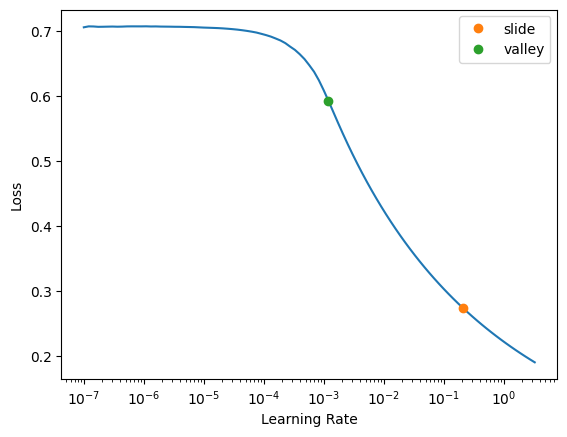

In [59]:
learner.lr_find(suggest_funcs=[slide, valley])

In [60]:
learner.fit_one_cycle(5)

In [61]:
learner.save("recipe-classifier-stage-8")

Path('models/recipe-classifier-stage-8.pth')

In [62]:
learner.export("/content/drive/MyDrive/New folder/models/recipe-classifier-stage-8.pkl")

SuggestedLRs(slide=0.0004786300996784121, valley=9.120108734350652e-05)

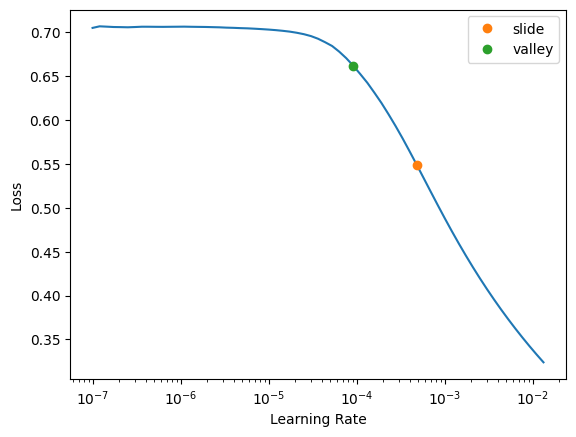

In [71]:
learner.unfreeze()
learner.lr_find(suggest_funcs=[slide, valley])

In [72]:
learner.fit_one_cycle(5)

In [ ]:
learner.save("recipe-classifier-stage-9")

In [77]:
learner.export("/content/drive/MyDrive/New folder/models/recipe-classifier-stage-9.pkl")